In [1]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive

Mounted at /gdrive/
/gdrive


In [2]:
ls

MyDrive/  Shareddrives/


In [3]:
cd/gdrive/MyDrive/Spider species Classification/

/gdrive/MyDrive/Spider species Classification


In [4]:
ls

'Bold Jumper'/  'Huntsman Spider'/  'Yellow Garden Spider'/


In [5]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing.image import load_img

In [6]:
import os
import PIL
import pathlib
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import preprocessing
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.python.ops.numpy_ops import np_utils

In [7]:
BATCH_SIZE = 62
IMAGE_SIZE = 256
EPOCHS=30
CHANNELS=3

In [8]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/gdrive/MyDrive/Spider species Classification",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 534 files belonging to 3 classes.


In [9]:
class_names = dataset.class_names
class_names

['Bold Jumper', 'Huntsman Spider', 'Yellow Garden Spider']

In [10]:
len(dataset)

9

In [11]:
for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape)
  print(image_batch[1])
  print(label_batch.numpy())

(62, 256, 256, 3)
tf.Tensor(
[[[175.       185.       160.      ]
  [173.375    184.1875   153.5     ]
  [164.0625   176.4375   134.8125  ]
  ...
  [144.       141.6875   105.25    ]
  [144.1875   141.1875   108.5625  ]
  [145.       142.       111.      ]]

 [[166.0625   176.0625   149.4375  ]
  [167.07812  177.89062  145.57812 ]
  [158.375    170.75     128.61719 ]
  ...
  [143.1875   140.875    104.4375  ]
  [143.22266  140.22266  107.59766 ]
  [143.375    140.375    109.375   ]]

 [[172.9375   183.625    154.5625  ]
  [169.53516  181.03516  146.84375 ]
  [154.14062  167.20312  123.10547 ]
  ...
  [142.3125   140.       103.5625  ]
  [142.3125   139.3125   106.42969 ]
  [142.3125   139.3125   106.9375  ]]

 ...

 [[113.625    121.3125    63.1875  ]
  [113.92969  122.42969   61.359375]
  [114.859375 123.11719   59.777344]
  ...
  [194.07422  196.15234  157.8711  ]
  [211.75     213.8125   180.0039  ]
  [176.8125   178.0625   147.25    ]]

 [[115.1875   122.1875    68.5625  ]
  [114.0

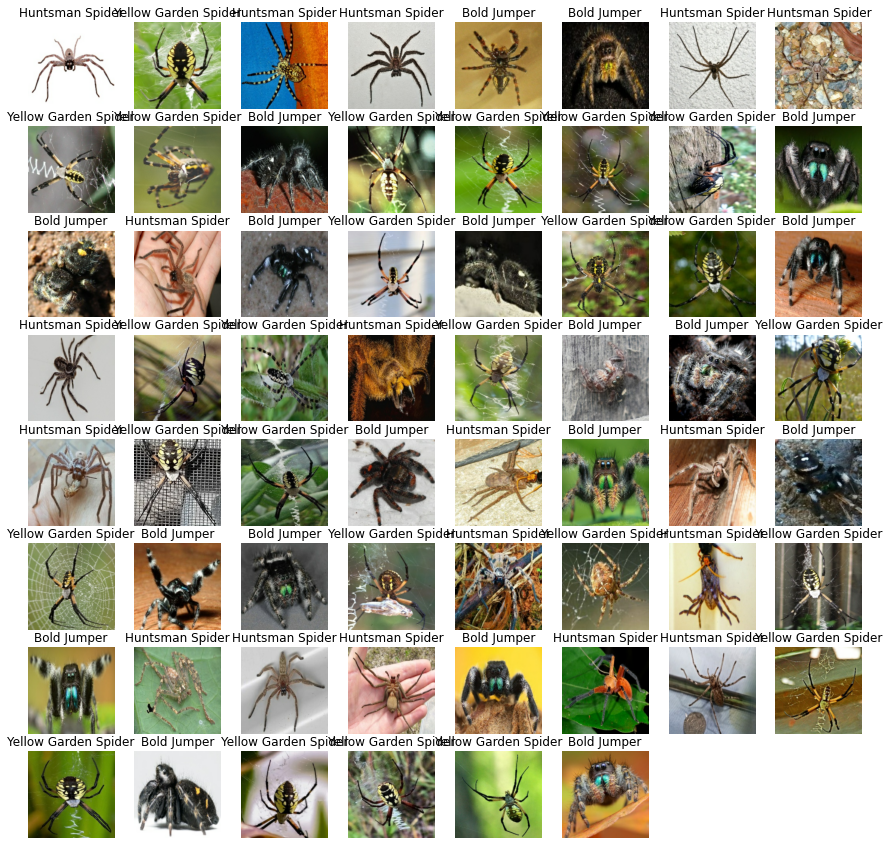

In [12]:
plt.figure(figsize=(15, 15))
for image_batch, labels_batch in dataset.take(1):
    for i in range(BATCH_SIZE):
        ax = plt.subplot(8, 8, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [13]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    # Autotune all the 3 datasets 
    train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    return train_ds, val_ds, test_ds

In [14]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [15]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [16]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [17]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 9

model = models.Sequential([
    resize_and_rescale,
    # data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)

In [18]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (62, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (62, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (62, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (62, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (62, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (62, 60, 60, 64)         

In [20]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/30
7/7 [==============================] - 49s 6s/step - loss: 1.7659 - accuracy: 0.3024
Epoch 2/30
7/7 [==============================] - 46s 7s/step - loss: 1.1217 - accuracy: 0.3683
Epoch 3/30
7/7 [==============================] - 46s 7s/step - loss: 1.0105 - accuracy: 0.5024
Epoch 4/30
7/7 [==============================] - 46s 7s/step - loss: 0.8762 - accuracy: 0.6146
Epoch 5/30
7/7 [==============================] - 46s 7s/step - loss: 0.7501 - accuracy: 0.6878
Epoch 6/30
7/7 [==============================] - 46s 7s/step - loss: 0.6382 - accuracy: 0.7512
Epoch 7/30
7/7 [==============================] - 46s 7s/step - loss: 0.5892 - accuracy: 0.7683
Epoch 8/30
7/7 [==============================] - 46s 7s/step - loss: 0.5258 - accuracy: 0.7927
Epoch 9/30
7/7 [==============================] - 46s 7s/step - loss: 0.4740 - accuracy: 0.8244
Epoch 10/30
7/7 [==============================] - 46s 7s/step - loss: 0.4321 - accuracy: 0.8390
Epoch 11/30
7/7 [======================

In [21]:
model.evaluate(test_ds)

2/2 [==============================] - 5s 2s/step - loss: 0.2073 - accuracy: 0.9677


[0.20734116435050964, 0.9677419066429138]

In [22]:
acc = history.history['accuracy']
loss = history.history['loss']

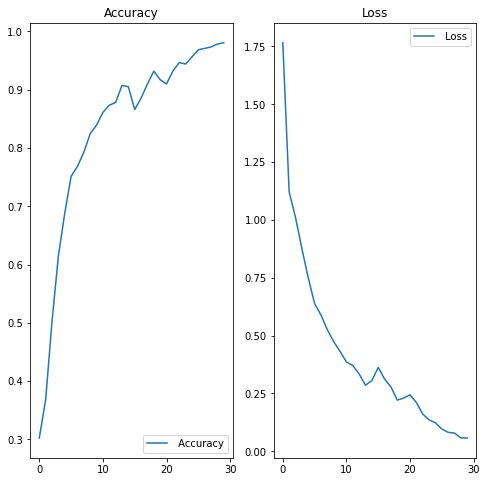

In [23]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label=' Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label=' Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

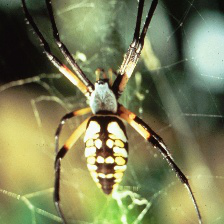

In [24]:
image_path = "/gdrive/My Drive/176.jpg"
image = preprocessing.image.load_img(image_path)
image_array = preprocessing.image.img_to_array(image)
scaled_img = np.expand_dims(image_array, axis=0)
image

In [25]:
pred = model.predict(scaled_img)

In [26]:
output = class_names[np.argmax(pred)]

In [27]:
output

'Yellow Garden Spider'

In [28]:
model.save("Spider species Classification.h5")